# Aerofit Treadmill Dataset

### Project Details: 
The market research team at AeroFit wants to identify the characteristics of the target 
audience for each type of treadmill oAered by the company, to provide a better 
recommendation of the treadmills to new customers. The team decides to investigate 
whether there are diAerences across the product with respect to customer 
characteristics. 

### Product Portfolio: 
- The KP281 is an entry-level treadmill that sells for $1,500; 
- The KP481 is for mid-level runners and sells for $1,750; 
- The KP781 treadmill have advanced features, and it sells for $2,500. 

### Data Description: 
The company collected data on individuals who purchased a treadmill from the AeroFit 
stores during the prior three months. The dataset in aerofit_treadmill_data.csv has the 
following features: 
- Product - product purchased: KP281, KP481, or KP781 
- Age - in years 
- Gender - male/female 
- Education - in years 
- MaritalStatus - single or partnered 
- Usage - the average number of times the customer plans to use the treadmill each week 
- Fitness - self-rated fitness on a 1-5 scale, where 1 is the poor shape and 5 is the excellent shape 
- Income - annual income in US dollars 
- Miles - the average number of miles the customer expects to walk/run each week

------------------------

## Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML


## Data Exploration and Processing:

**Importing data**

In [5]:
df=pd.read_csv('/Users/Admin/Desktop/DS Bootcamp/Python/EDA/EDA Portfolio Project/Aerofit Treadmill Sales Analysis/Aerofit Treadmill Dataset.csv')

**Reading dataframe** 

In [6]:
df.sample(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
70,KP281,38,Male,14,Single,2,3,52302,56
89,KP481,23,Female,16,Single,3,3,45480,95
153,KP781,25,Male,18,Partnered,4,3,64741,100
2,KP281,19,Female,14,Partnered,4,3,30699,66
132,KP481,37,Female,16,Partnered,2,3,48891,85
137,KP481,40,Male,16,Partnered,3,3,64809,95
10,KP281,22,Male,14,Single,3,3,36384,85
106,KP481,25,Female,14,Single,2,2,45480,42
79,KP281,50,Female,16,Partnered,3,3,64809,66
160,KP781,27,Male,18,Single,4,3,88396,100


**Check the shape of the dataframe**

In [7]:
df.shape

(180, 9)

**Datatype of each column**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


- All data types are correct.

**Missing value detection**

In [9]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

- No missing values in data.

**Checking duplicate values in the dataset**

In [10]:
df[df.duplicated()].sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: object

- No duplicated values in data.

In [11]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


---------------------------

## Statistical Summary:
- Provide an analysis of the statistical summary in few lines for both categorical and 
numerical features.

**Numerical features Summary**

- The dataset covers individuals aged 18 to 50, with an average age of 28.8 years. 
- Education levels range from 12 to 21 years, with most people having around 16 years. 
- Usage frequency (2-7 times/week) and fitness levels (1-5 scale) are centered around 3-4. 
- Income varies widely ($29K–$104K), with a high standard deviation, suggesting income disparity. 
- Miles run per week (21–360 miles) also shows significant variability, indicating different levels of engagement.

**Categorical features Summary**

- The dataset has three categorical features: Product Code (KP281, KP481, KP781), Gender (Male, Female), and Marital Status (Single, Partnered). 
- The product distribution should be checked for any dominant category. 
- Gender and Marital Status are balanced or imbalanced based on their frequency distribution, which may impact other variables like income or product usage

In [12]:
categoricals=df.select_dtypes(exclude=np.number).columns
categoricals

Index(['Product', 'Gender', 'MaritalStatus'], dtype='object')

In [13]:
print(df['Product'].unique())
print(df['Gender'].unique())
print(df['MaritalStatus'].unique())

['KP281' 'KP481' 'KP781']
['Male' 'Female']
['Single' 'Partnered']


-----------------------

## Non-Graphical Analysis: 

**Value Counts for all categorical features** 

In [14]:
df[['Product', 'Gender', 'MaritalStatus']].value_counts()

Product  Gender  MaritalStatus
KP281    Female  Partnered        27
         Male    Partnered        21
KP481    Male    Partnered        21
KP281    Male    Single           19
KP781    Male    Partnered        19
KP481    Female  Partnered        15
                 Single           14
KP781    Male    Single           14
KP281    Female  Single           13
KP481    Male    Single           10
KP781    Female  Partnered         4
                 Single            3
Name: count, dtype: int64

**Unique Attributes for all categorical features**

In [15]:
df[['Product', 'Gender', 'MaritalStatus']].apply(lambda x: x.unique())


Product          [KP281, KP481, KP781]
Gender                  [Male, Female]
MaritalStatus      [Single, Partnered]
dtype: object

-------------------------

## Graphical Analysis: 

### Univariate Analysis - Numerical features:

**Distribution Plot**

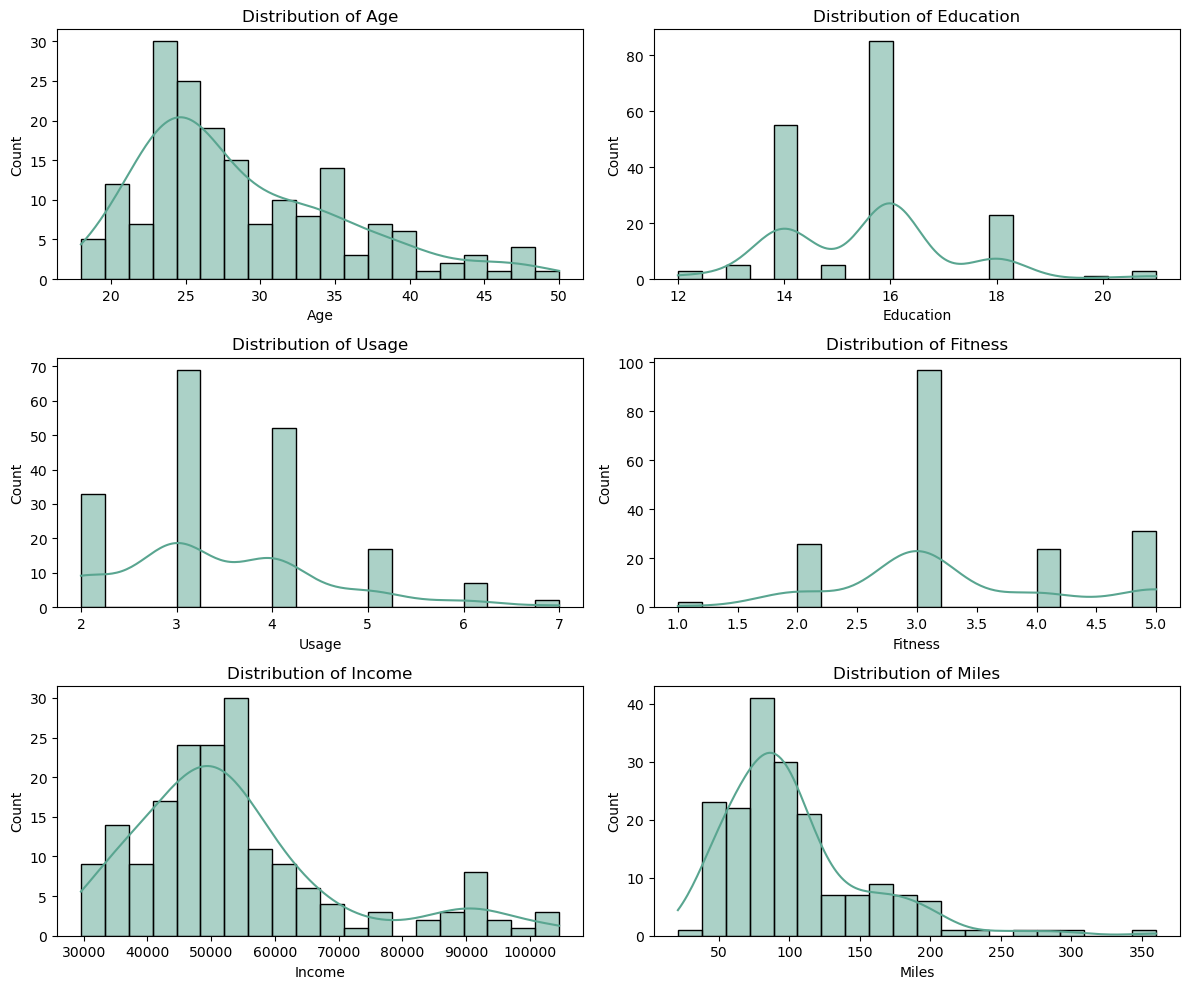

In [16]:
plt.figure(figsize=(12, 10))
num_cols = df.select_dtypes(include=np.number).columns

for i, col in enumerate(num_cols):
    plt.subplot(3, 2, i + 1)  
    sns.histplot(df[col], bins=20, kde=True, color=sns.color_palette("crest")[1])
    plt.title(f'Distribution of {col}')
plt.tight_layout()  
plt.show()

**OBSERVATIONS**
- Most users who purchased a treadmill are between 20 to 30 years old, indicating a strong preference among young adults.
- The majority of users have an Education level at the Bachelor's and Master's levels, suggesting that higher education might influence fitness awareness.
- Users prefer exercising 2 to 3 times weekly, showing a trend toward maintaining a moderate fitness routine.
- The Fitness level of most users is average, with a smaller percentage categorized as highly fit.
- The majority of users have an Income range between $30K to $60K, indicating that affordability plays a role in treadmill purchases.
- Users prefer running 50 to 120 miles per week, showing a commitment to long-distance running or endurance training.

**Count Plot**

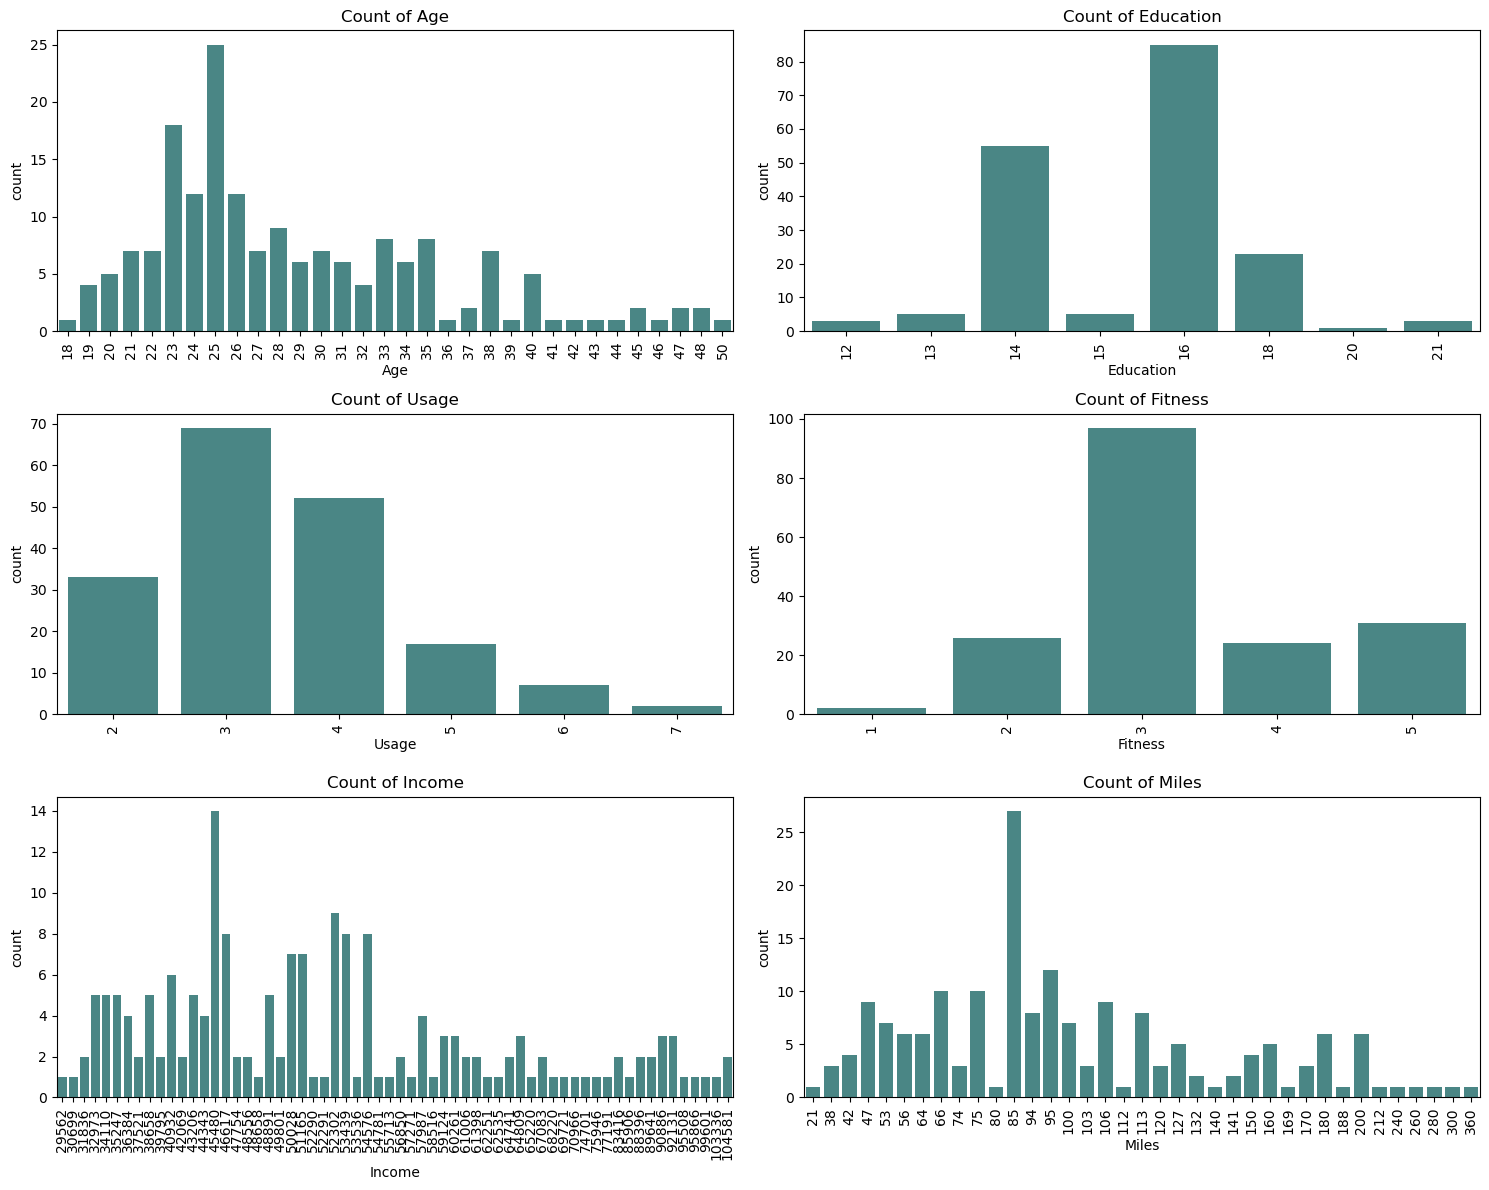

In [17]:
plt.figure(figsize=(15, 12))
num_cols = df.select_dtypes(include=np.number).columns

for i, col in enumerate(num_cols):
    plt.subplot(3, 2, i + 1) 
    sns.countplot(x=df[col], color=sns.color_palette("crest")[2])
    plt.title(f'Count of {col}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Box Plot**

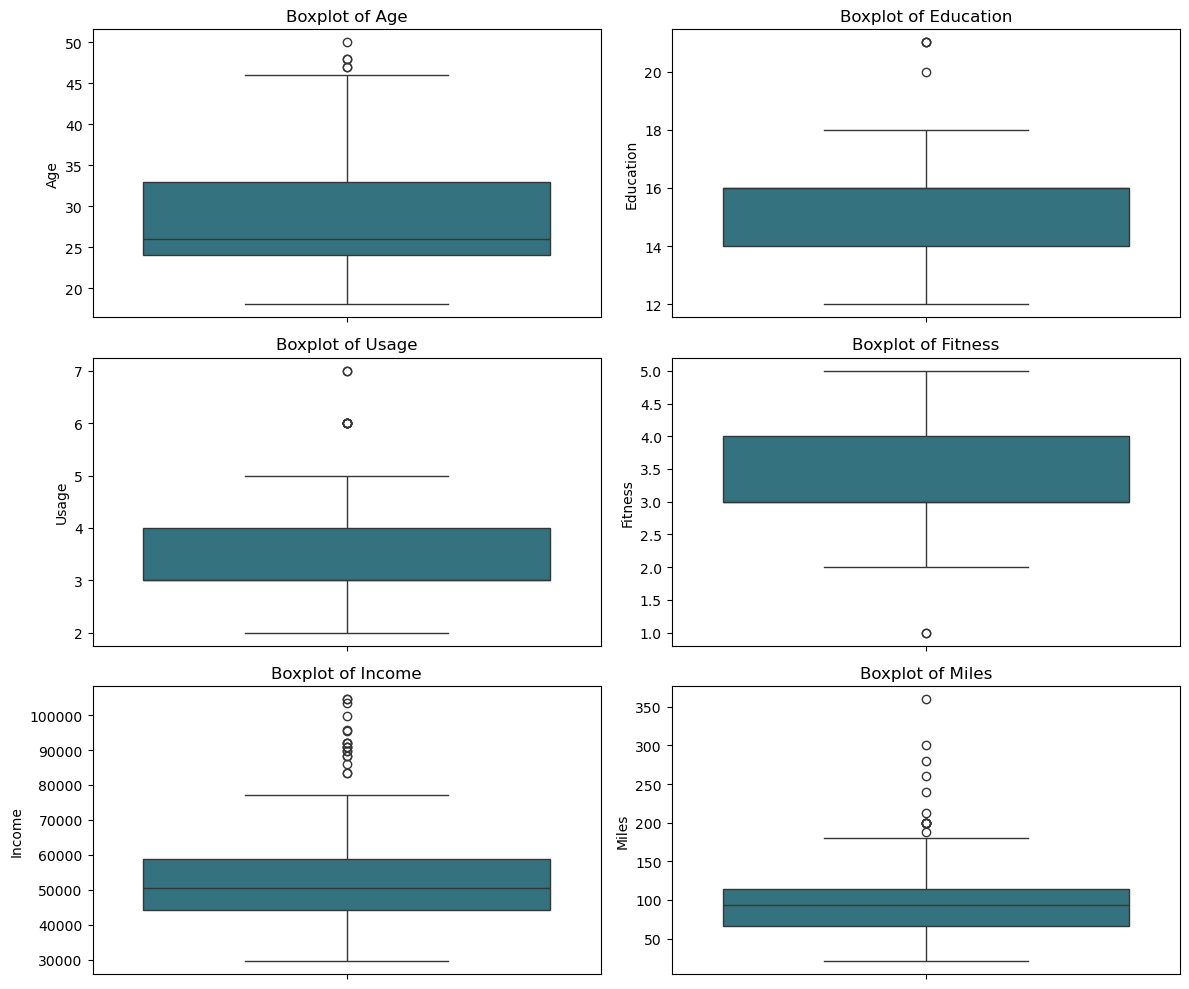

In [18]:
plt.figure(figsize=(12, 10))
num_cols = df.select_dtypes(include=np.number).columns

for i, col in enumerate(num_cols):
    plt.subplot(3, 2, i + 1) 
    sns.boxplot(y=df[col], color=sns.color_palette("crest")[3])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

**Observation**
- `Age` column has no outliers—elderly individuals also prioritize fitness, showing that exercise is valued across all age groups.
- `Education` column has no outliers—typically, 20 to 22 years of education corresponds to a Ph.D., aligning with expected academic trends.
- `Usage` column has no outliers—some individuals prefer exercising 6-7 times a week, which could indicate a disciplined fitness routine or athletic training.
- `Fitness` column has no outliers—variation in fitness levels is natural, as factors like lifestyle, diet, and genetics play a role.
- `Income` column has no outliers—fitness interest appears independent of income levels, suggesting that staying active is a universal priority.
- `Miles` column has no outliers—dedicated fitness enthusiasts might push their limits, running longer distances as part of their fitness journey.

-------------------------

## Univariate Analysis - Categorical features:

**Count Plot** 

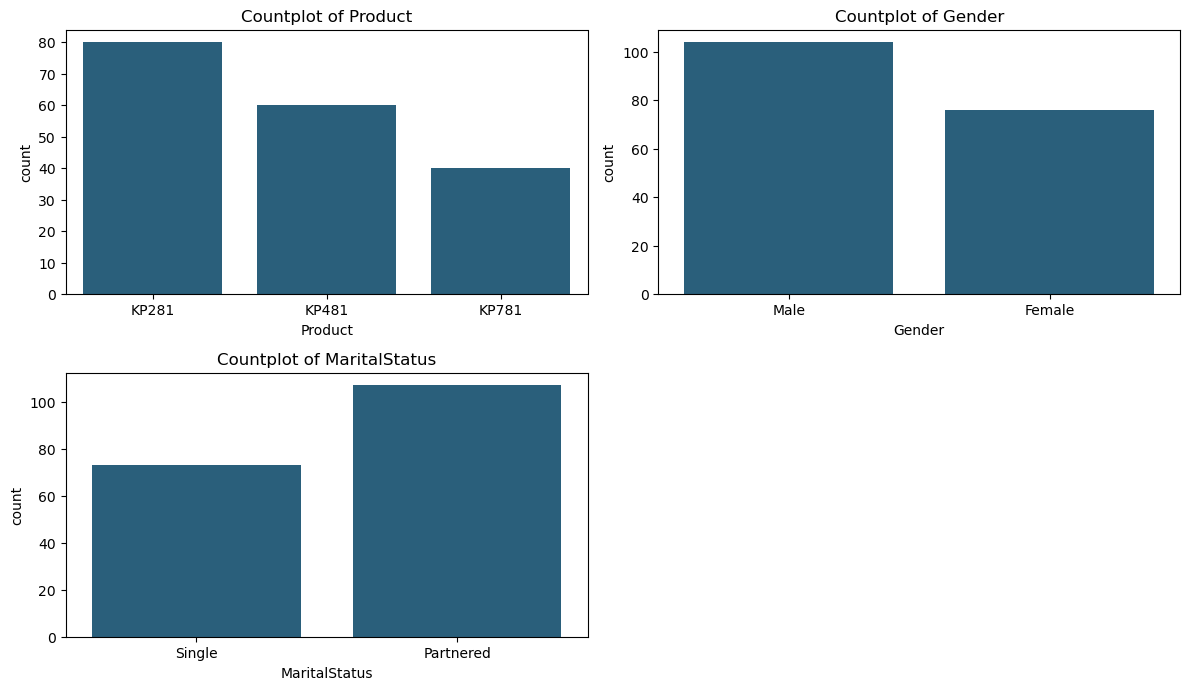

In [19]:
plt.figure(figsize=(12,10))
cat_cols=df.select_dtypes(include=['object', 'category']).columns

for i, col in enumerate(cat_cols):
    plt.subplot(3, 2, i + 1)
    sns.countplot(x=df[col], color=sns.color_palette("crest")[4])
    plt.title(f'Countplot of {col}')
plt.tight_layout()
plt.show()

**Observations**
- The entry-level treadmill model KP281, priced around $1,500, has the highest sales compared to other models, indicating its popularity among budget-conscious buyers.
- Male users purchase treadmills more frequently than female users, suggesting a higher interest in fitness equipment among men.
- Partnered individuals tend to buy treadmills more than singles, possibly due to shared fitness goals or family-oriented health concerns.

----------------------

## Bivariate Analysis:

- Check features effect on the product purchased e.g.  
    - Product vs Gender 
    - Product vs MaritalStatus 
    - Product vs Age

**Product vs Gender**

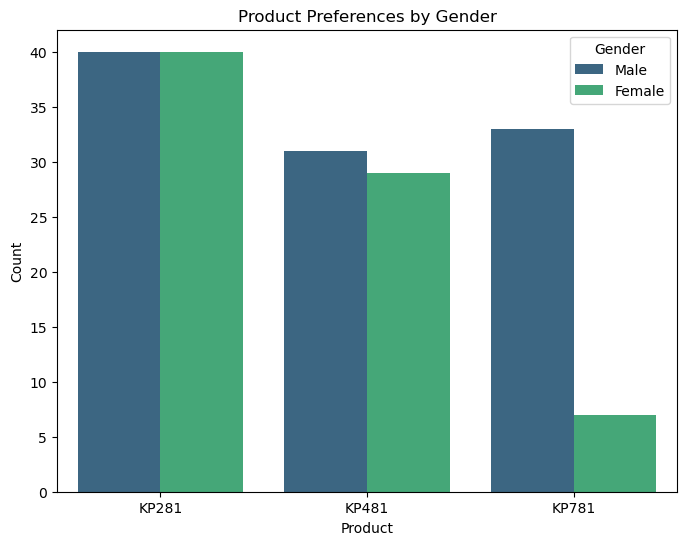

In [20]:
plt.figure(figsize=(8,6))

sns.countplot(data=df, x='Product', hue='Gender', palette='viridis')  

plt.title('Product Preferences by Gender')
plt.xlabel('Product')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()


**Product vs Martial Status**

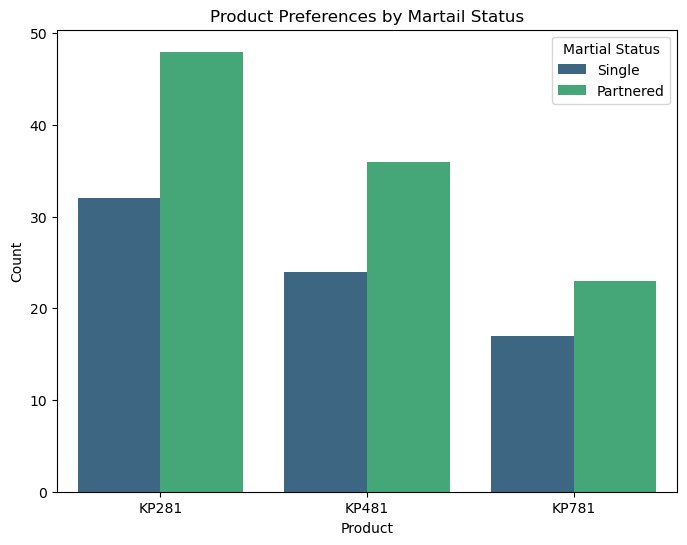

In [21]:
plt.figure(figsize=(8,6))

sns.countplot(data=df, x='Product', hue='MaritalStatus', palette='viridis')  

plt.title('Product Preferences by Martail Status')
plt.xlabel('Product')
plt.ylabel('Count')
plt.legend(title='Martial Status')
plt.show()

**Product vs Age**

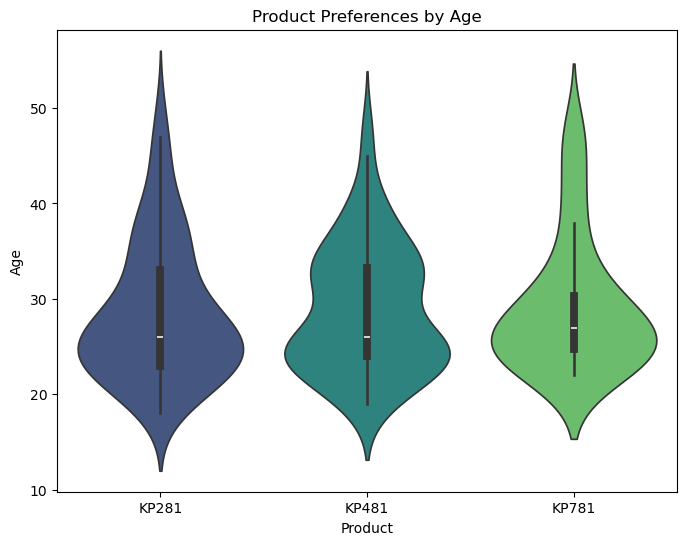

In [22]:
plt.figure(figsize=(8,6))

sns.violinplot(data=df, x='Product', y='Age', hue='Product', palette='viridis')

plt.title('Product Preferences by Age')
plt.xlabel('Product')
plt.ylabel('Age')
plt.show()

## Multivariate Analysis: 

**Create pairplots to show relationship of features**

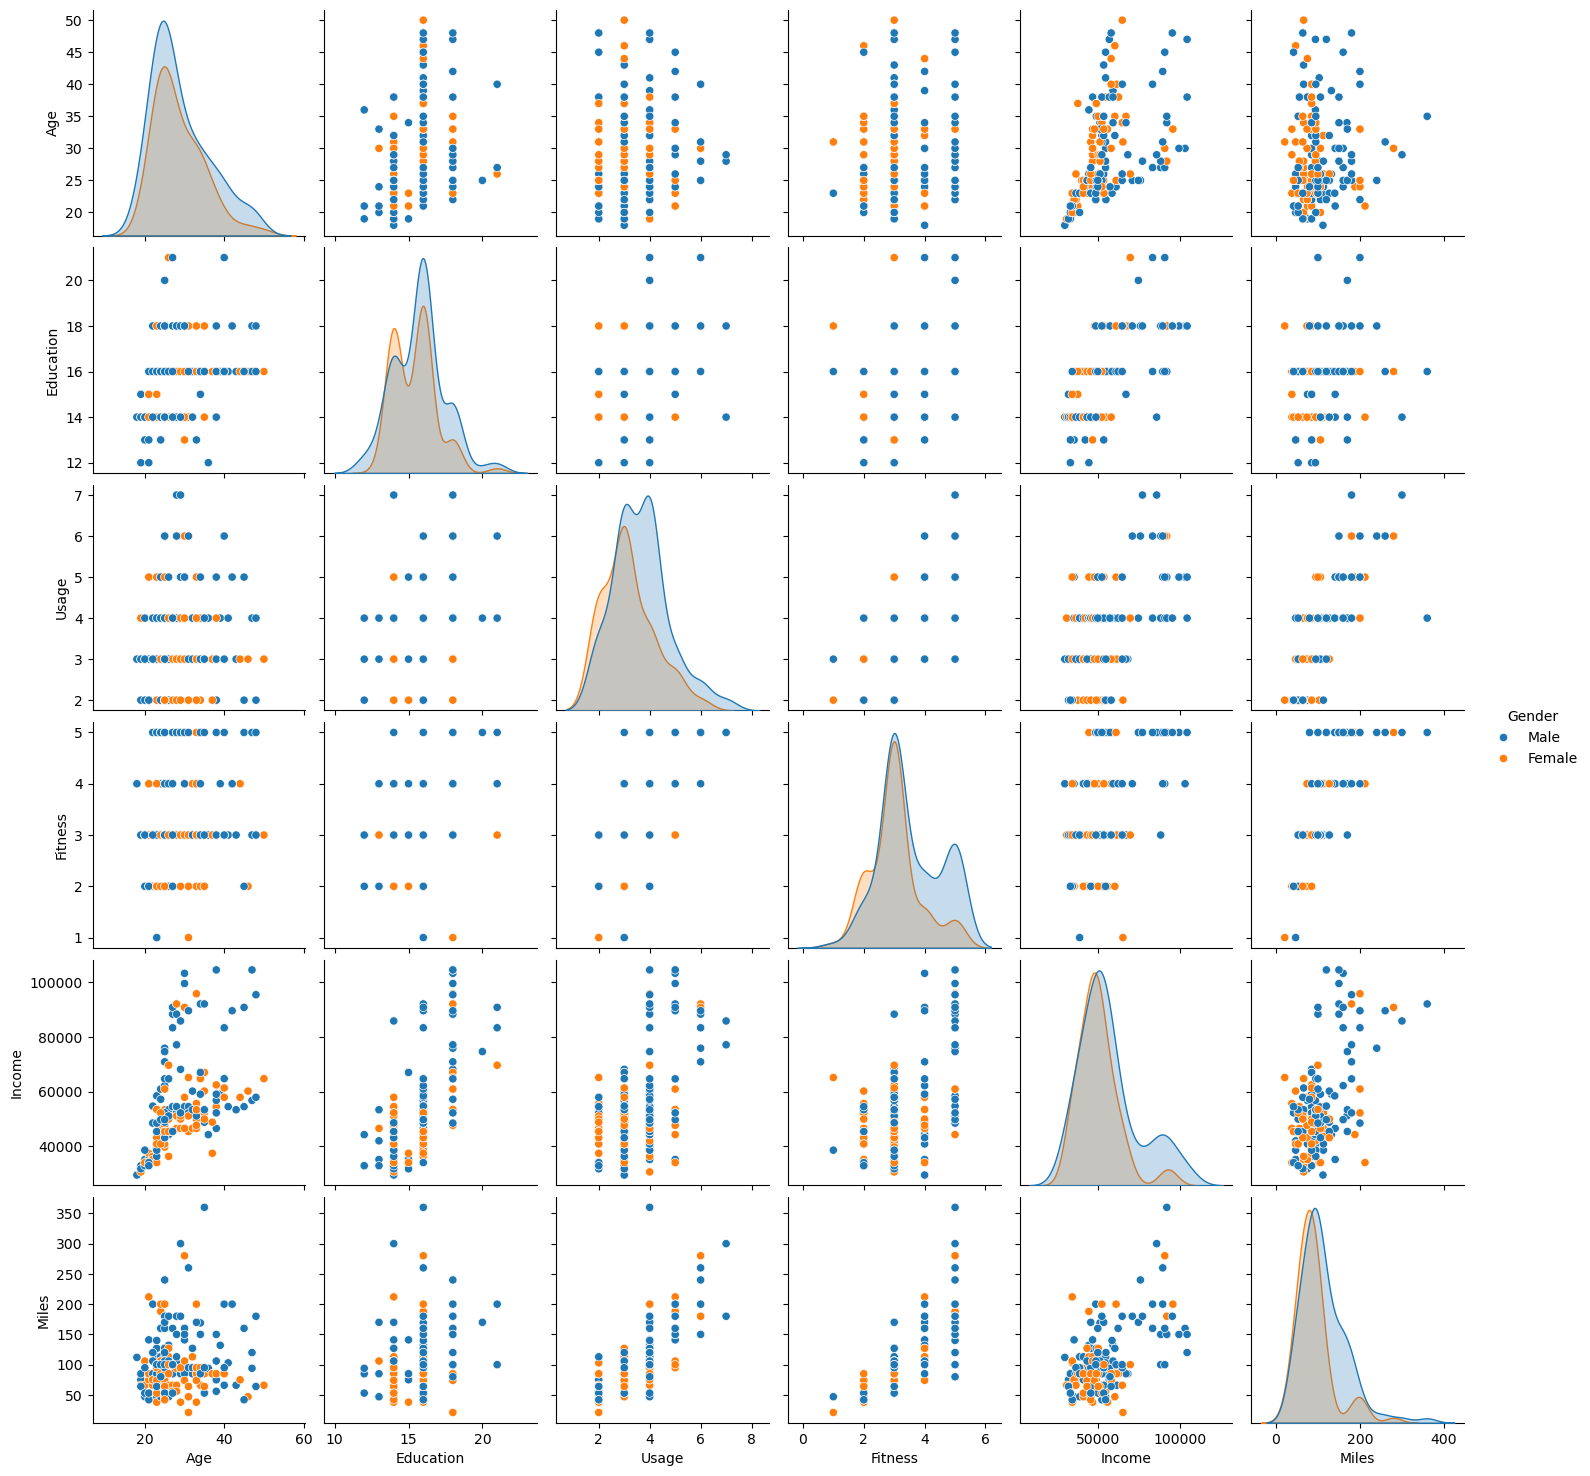

In [23]:
numeric_cols = df.select_dtypes(include='number').columns.tolist()
sns.pairplot(df[numeric_cols + ['Gender']], hue='Gender')

plt.show()

-------------

## Correlation Analysis: 
**Show the correlation matrix on heatmap and write your observation of findings in few lines.**

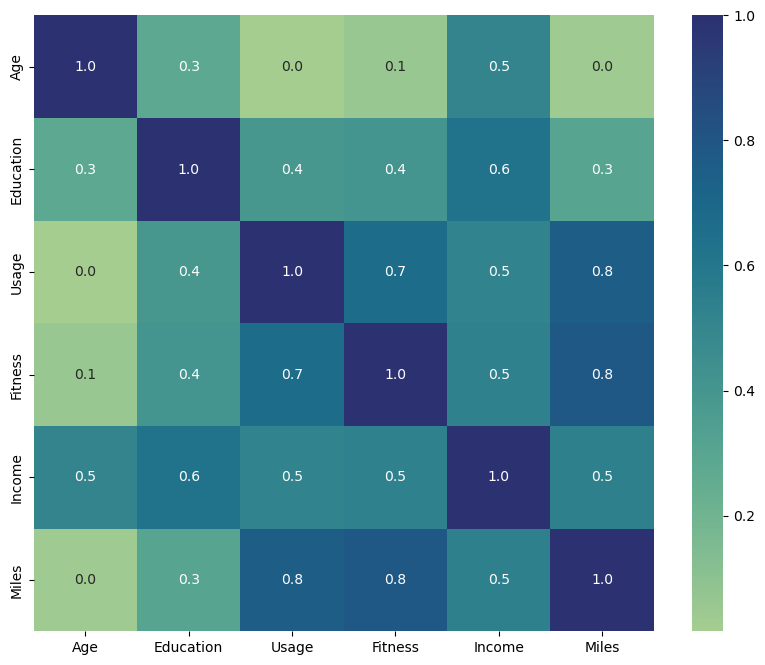

In [24]:
plt.figure(figsize=(10,8))
corr_matrix = df.select_dtypes(include='number').corr()
sns.heatmap(corr_matrix,annot=True, cmap="crest",fmt=".1f")
plt.show()

**Observations**
- `Age` strongly correlates with Income, indicating that higher age groups tend to have higher earnings.
- `Education` strongly correlates with Income, suggesting that individuals with higher education levels generally earn more.
- `Usage`strongly correlates with Fitness and Miles, meaning that people who use the product more frequently tend to be fitter and cover more distance.
- `Fitness` strongly correlates with Usage and Miles, reinforcing that physically active individuals engage in frequent usage and travel longer distances.
- `Income` strongly correlates with Education, reaffirming the positive relationship between education level and earnings.
- `Miles` strongly correlates with Usage and Fitness, suggesting that higher fitness levels and frequent usage contribute to covering more distance.

-----------------------------

## Outlier Detection: 
**Check for the outliers by using the IQR method.** 

In [25]:
outliers = {}

for col in df.select_dtypes(include='number').columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    upper_limit = q3 + 1.5 * IQR
    lower_limit = q1 - 1.5 * IQR
    
    outlier_values = df[(df[col] > upper_limit) | (df[col] < lower_limit)][col]
    
    outliers[col] = outlier_values.tolist()

    print(f"\nColumn: {col}")
    print(f"Upper Limit: {upper_limit}, Lower Limit: {lower_limit}")
    print(f"Outliers: {outlier_values.tolist()}")


Column: Age
Upper Limit: 46.5, Lower Limit: 10.5
Outliers: [47, 50, 48, 47, 48]

Column: Education
Upper Limit: 19.0, Lower Limit: 11.0
Outliers: [20, 21, 21, 21]

Column: Usage
Upper Limit: 5.5, Lower Limit: 1.5
Outliers: [6, 6, 6, 7, 6, 7, 6, 6, 6]

Column: Fitness
Upper Limit: 5.5, Lower Limit: 1.5
Outliers: [1, 1]

Column: Income
Upper Limit: 80581.875, Lower Limit: 22144.875
Outliers: [83416, 88396, 90886, 92131, 88396, 85906, 90886, 103336, 99601, 89641, 95866, 92131, 92131, 104581, 83416, 89641, 90886, 104581, 95508]

Column: Miles
Upper Limit: 187.875, Lower Limit: -7.125
Outliers: [188, 212, 200, 200, 200, 240, 300, 280, 260, 200, 360, 200, 200]


---------

## Conditional Probabilities: 
**What percent of customers have purchased KP281, KP481, or KP781?**

In [26]:
# Find the total/count of products
total_of_products = df['Product'].count()
print(f'The total no of Products is: {total_of_products}')

# Filter Products from the given products
filter_products = df[df['Product'].isin(['KP281','KP481','KP781'])]['Product'].count()
print(f'Filtered products is: {filter_products}')

# Find the percentage of customers have purchased 'KP281','KP481','KP781'
percentage_customers = (filter_products / total_of_products) * 100
print(f'The percentage of customers that purchased KP281,KP481,KP781 is: {percentage_customers}%')

The total no of Products is: 180
Filtered products is: 180
The percentage of customers that purchased KP281,KP481,KP781 is: 100.0%


**Create frequency tables and calculate the percentage as follows** 
- **Product – Gender** 
    - Percentage of a Male customer purchasing a treadmill 
    - Percentage of a Female customer purchasing KP781 treadmill 
    - Probability of a customer being a Female given that Product is KP281
- **Product – Age** 
    - Percentage of customers with Age between 20s and 30s among all customers 
- **Product – Income** 
    - Percentage of a low-income customer purchasing a treadmill 
    - Percentage of a high-income customer purchasing KP781 treadmill 
    - Percentage of customer with high-income salary buying treadmill given that Product is KP781
  
      - **Income table is right skewed so i split income based on quartile**
        - Low Income: Below the 25th percentile (Q1) → Income < 44,058.75
        - Middle Income: Between Q1 and Q3 (44,058.75 to 58,668.00)
        - High Income: Above the 75th percentile (Q3) → Income > 58,668.00
- **Product – Fitness** 
    - Percentage of customers that have fitness level 5 
    - Percentage of a customer with Fitness Level 5 purchasing KP781 treadmill 
    - Percentage of customer with fitness level 5 buying KP781 treadmill 
- **Product - Marital Status** 
    - Percentage of a customers who are partnered using treadmills 

In [27]:
display(HTML("<b>Product - Gender:</b>"))
# Total number of customers
total_customers = df['Gender'].count()
print(f'Total number of customers: {total_customers}')

# Count of male
count_of_male=(df['Gender']=='Male').sum()
print(f'\nThe count of Male customers: {count_of_male}')

# Percentage of Male customers purchasing a treadmill
percentage_male = (count_of_male / total_customers ) * 100
print(f'The percentage of Male customers purchasing a treadmill: {percentage_male:.2f}%')

# Count of a Female customer purchasing KP781 treadmill
count_of_female_KP781 = df[(df['Gender'] == 'Female') & (df['Product'] == 'KP781')]['Gender'].count()
print(f'\nThe count of female purchasing KP781 treadmill: {count_of_female_KP781}')

# Percentage of Female customers purchasing KP781 treadmill
percentage_female = (count_of_female_KP781 / total_customers) * 100
print(f'The percentage of Female customers purchasing a KP781 treadmill: {percentage_female:.2f}%')

# Total no of pruchasing KP281 treadmill is
total_KP281 = (df['Product'] == 'KP281').sum()
print(f'\nThe total no of pruchasing KP281 treadmill: {total_KP281}')

#count of Female purchasing KP281 treadmill is
count_of_female_KP281 = df[(df['Gender']== 'Female') & (df['Product'] == 'KP281')]['Gender'].count()
print(f'The count of Female purchasing KP281 treadmill: {count_of_female_KP281}')

# Probability of a customer being Female given that they purchased KP281 treadmill
prob_female_given_KP281 = count_of_female_KP281 / total_KP281 if total_KP281 != 0 else 0
print(f'The probablity of a customer being a Female given that product is KP281: {prob_female_given_KP281:.2f}')

display(HTML("<b>Product - Age:</b>"))
# Count customers Age between 20 to 30
age_20_30 = df[(df['Age'] >= 20) & (df['Age'] <= 30)]['Age'].count()
print(f'Count of customers Age between 20 to 30: {age_20_30}')

# Percentage of customers with Age betweem 20s and 30s among all customers
percentage_age_20_30 = (age_20_30 / total_customers) * 100
print(f'Percentage of customers with Age betweem 20s and 30s among all customers: {percentage_age_20_30:.2f}%')

display(HTML("<b>Product - Income:</b>"))
# Count of low-income customers 
low_income = df[df['Income'] < 44058]['Income'].count()
print(f'Low income customers count: {low_income}')

# Percentage of low-income customers purchasing a treadmill is
percenatge_low_income = ( low_income / total_customers) * 100
print(f'Percentage of low-income customers purchasing a treadmill: {percenatge_low_income:.2f}%')

# Count of high-income customers 
high_income = df[df['Income'] > 58668]['Income'].count()
print(f'\nHigh income customers count: {high_income}')

# Count of High income customers purchasing KP781 treadmill
high_income_kp781 = df[(df['Income'] > 58668) & (df['Product'] == 'KP781')]['Income'].count()
print(f'High income customers purchasing KP781 treadmill count: {high_income_kp781}')

# Percentage of high-income customers purchasing KP781 treadmill
percentage_high_income_kp781 = (high_income_kp781 / total_customers) * 100
print(f'Percentage of a high-income customers purchasing KP781 treadmill: {percentage_high_income_kp781:.2f}%')

display(HTML("<b>Product - Fitness:</b>"))
# Count of Fitness level 5
count_fitness_5 = df[df['Fitness'] == 5]['Fitness'].count()
print(f'Count of Fitness level 5: {count_fitness_5}')

# Percentage of customers that have Fitness level 5
percentage_fitness_5 = (count_fitness_5 / total_customers) * 100
print(f'Percentage of customers that have Fitness level 5: {percentage_fitness_5:.2f}%')

# Count of Fitness level 5 purchasing KP781 treadmill 
count_fitness_5_kp781 = df[(df['Fitness'] == 5) & (df['Product'] == 'KP781')]['Fitness'].count()
print(f'\nCount of Fitness level 5 purchasing KP781 treadmill: {count_fitness_5_kp781}')

# Percentage of a customers with Fitness level 5 purchasing Kp781 treadmill
percenatge_fitness_5_kp781 = (count_fitness_5_kp781 / total_customers) * 100
print(f'Percentage of a customers with Fitness level 5 purchasing Kp781 treadmill: {percenatge_fitness_5_kp781:.2f}%')

display(HTML("<b>Product - Martial Status:</b>"))
# Count of Partnered customers
count_partnered = df[df['MaritalStatus'] == 'Partnered']['MaritalStatus'].count()
print(f'Count of Partnered customers: {count_partnered}')

# Percentage of a customers who are Partnered using treadmill 
percenatage_partnered = (count_partnered / total_customers) * 100
print(f'Percentage of a customers who are Partnered using treadmill: {percenatage_partnered:.2f}%')

Total number of customers: 180

The count of Male customers: 104
The percentage of Male customers purchasing a treadmill: 57.78%

The count of female purchasing KP781 treadmill: 7
The percentage of Female customers purchasing a KP781 treadmill: 3.89%

The total no of pruchasing KP281 treadmill: 80
The count of Female purchasing KP281 treadmill: 40
The probablity of a customer being a Female given that product is KP281: 0.50


Count of customers Age between 20 to 30: 115
Percentage of customers with Age betweem 20s and 30s among all customers: 63.89%


Low income customers count: 45
Percentage of low-income customers purchasing a treadmill: 25.00%

High income customers count: 45
High income customers purchasing KP781 treadmill count: 29
Percentage of a high-income customers purchasing KP781 treadmill: 16.11%


Count of Fitness level 5: 31
Percentage of customers that have Fitness level 5: 17.22%

Count of Fitness level 5 purchasing KP781 treadmill: 29
Percentage of a customers with Fitness level 5 purchasing Kp781 treadmill: 16.11%


Count of Partnered customers: 107
Percentage of a customers who are Partnered using treadmill: 59.44%


**Frequency Table & Percentage Table**

In [28]:
# Frequency Table for Gender vs Product
freq_table_gender = pd.crosstab(df['Gender'], df['Product'])
percentage_table_gender = pd.crosstab(df['Gender'], df['Product'], normalize='index') * 100

# Frequency Table for Age Groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 19, 30, 40, 50, 60, 100], labels=['<20', '20-30', '31-40', '41-50', '51-60', '60+'])
freq_table_age = pd.crosstab(df['AgeGroup'], df['Product'])
percentage_table_age = pd.crosstab(df['AgeGroup'], df['Product'], normalize='index') * 100

# Frequency Table for Income Groups
df['IncomeGroup'] = pd.cut(df['Income'], bins=[0, 44057, 58668, df['Income'].max()], labels=['Low', 'Medium', 'High'])
freq_table_income = pd.crosstab(df['IncomeGroup'], df['Product'])
percentage_table_income = pd.crosstab(df['IncomeGroup'], df['Product'], normalize='index') * 100

# Frequency Table for Fitness Level
freq_table_fitness = pd.crosstab(df['Fitness'], df['Product'])
percentage_table_fitness = pd.crosstab(df['Fitness'], df['Product'], normalize='index') * 100

# Frequency Table for Marital Status
freq_table_marital = pd.crosstab(df['MaritalStatus'], df['Product'])
percentage_table_marital = pd.crosstab(df['MaritalStatus'], df['Product'], normalize='index') * 100

display(HTML("<b>Product - Gender:</b>"))
print("Frequency Table - Gender vs Product:\n", freq_table_gender)
print("\nPercentage Table - Gender vs Product:\n", percentage_table_gender)

display(HTML("<b>Product - Age:</b>"))
print("Frequency Table - Age vs Product:\n", freq_table_age)
print("\nPercentage Table - Age vs Product:\n", percentage_table_age)

display(HTML("<b>Product - Income:</b>"))
print("Frequency Table - Income vs Product:\n", freq_table_income)
print("\nPercentage Table - Income vs Product:\n", percentage_table_income)

display(HTML("<b>Product - Fitness:</b>"))
print("Frequency Table - Fitness vs Product:\n", freq_table_fitness)
print("\nPercentage Table - Fitness vs Product:\n", percentage_table_fitness)

display(HTML("<b>Product - Martial Status:</b>"))
print("Frequency Table - Marital Status vs Product:\n", freq_table_marital)
print("\nPercentage Table - Marital Status vs Product:\n", percentage_table_marital)

Frequency Table - Gender vs Product:
 Product  KP281  KP481  KP781
Gender                      
Female      40     29      7
Male        40     31     33

Percentage Table - Gender vs Product:
 Product      KP281      KP481      KP781
Gender                                  
Female   52.631579  38.157895   9.210526
Male     38.461538  29.807692  31.730769


Frequency Table - Age vs Product:
 Product   KP281  KP481  KP781
AgeGroup                     
<20           4      1      0
20-30        51     34     30
31-40        19     23      6
41-50         6      2      4

Percentage Table - Age vs Product:
 Product       KP281      KP481      KP781
AgeGroup                                 
<20       80.000000  20.000000   0.000000
20-30     44.347826  29.565217  26.086957
31-40     39.583333  47.916667  12.500000
41-50     50.000000  16.666667  33.333333


Frequency Table - Income vs Product:
 Product      KP281  KP481  KP781
IncomeGroup                     
Low             30     15      0
Medium          43     36     11
High             7      9     29

Percentage Table - Income vs Product:
 Product          KP281      KP481      KP781
IncomeGroup                                 
Low          66.666667  33.333333   0.000000
Medium       47.777778  40.000000  12.222222
High         15.555556  20.000000  64.444444


Frequency Table - Fitness vs Product:
 Product  KP281  KP481  KP781
Fitness                     
1            1      1      0
2           14     12      0
3           54     39      4
4            9      8      7
5            2      0     29

Percentage Table - Fitness vs Product:
 Product      KP281      KP481      KP781
Fitness                                 
1        50.000000  50.000000   0.000000
2        53.846154  46.153846   0.000000
3        55.670103  40.206186   4.123711
4        37.500000  33.333333  29.166667
5         6.451613   0.000000  93.548387


Frequency Table - Marital Status vs Product:
 Product        KP281  KP481  KP781
MaritalStatus                     
Partnered         48     36     23
Single            32     24     17

Percentage Table - Marital Status vs Product:
 Product            KP281      KP481      KP781
MaritalStatus                                 
Partnered      44.859813  33.644860  21.495327
Single         43.835616  32.876712  23.287671


---------------

## Actionable Insights & Recommendations:
**Age Groups for Each Treadmill Model**
- Insight: The majority of treadmill buyers are between 20 and 30 years old.
- Action: Focus marketing efforts on young adults by targeting university students, professionals, and fitness-conscious millennials.
**Income Based Product Segmentation**
- Insight:
  - The KP281 (entry-level) treadmill is most popular among buyers earning below $60K.
  - The KP481 (mid-range) treadmill attracts mid-income customers.
  - The KP781 (premium model) is primarily purchased by high-income individuals earning above $80K.
- Action:
  - Offer flexible payment plans or financing options for mid-income buyers to push sales of KP481.
  - Use premium branding and exclusive gym partnerships to attract high-income buyers for KP781.
  
**Gender Based Purchase Trends**
- Insight: Male customers purchase more treadmills than female customers.
- Action:
  - Run women-focused fitness campaigns to encourage female participation.
  - Offer promotions like discounts on family/couple purchases to increase female buyers.

**Marital Status & Purchase Behavior**
- Insight: Partnered individuals buy more treadmills than singles.
- Action:
  - Promote "Couple Fitness Bundles" or "Family Fitness Discounts" to encourage purchases.
  - Create referral programs where one treadmill buyer can refer their spouse/family and earn a discount.

**Fitness Levels & Usage Patterns**
- Insight:
  - Customers who rate their fitness level 4 or 5 (highly fit) are more likely to buy the KP781 model.
  - Lower fitness levels correlate with lower treadmill usage per week.
- Action:
  - KP781 Marketing: Target athletes, marathon runners, and high-intensity users with advanced treadmill features.
  - Offer fitness starter guides or free virtual training to encourage more frequent treadmill use among lower fitness groups.

**Customer Usage & Miles Run**
- Insight:
  - Most customers plan to use the treadmill 2-3 times per week, but some high-usage buyers (6-7 times per week) prefer premium models.
  - Buyers who plan to run more miles per week also opt for higher-end models.
- Action:
  - Market KP781 with performance-tracking features for long-distance runners.
  - Promote the durability and comfort of KP481 for regular users.

**Most Popular Treadmill & Pricing Impact**
- Insight: The entry-level treadmill (KP281, $1,500) has the highest sales, likely due to affordability.
- Action:
  - Introduce seasonal discounts on the mid-range KP481 to increase sales.
  - Offer an upgrade plan where KP281 buyers can trade in their treadmill for a discount on KP481/KP781.

**Enhancing Customer Recommendations**
- Insight: Factors like income, fitness level, and usage frequency significantly impact treadmill choice.
- Action: Implement a personalized treadmill recommendation system based on customer demographics and fitness goals.

**Recommendations**
- Run targeted campaigns based on age, gender, and income insights.
- Offer financing options to make mid and high-range treadmills accessible.
- Leverage referral & family discounts to boost sales among partnered individuals.
- Differentiate treadmill models in marketing to highlight key features.
- Enhance post-purchase engagement with workout plans and personalized training programs.